<a href="https://colab.research.google.com/github/AdityaNerpagar/TensorFlow_ML_basics/blob/main/ML_Basics_CV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

# Step 1: Load dataset(Fashion MNIST) from set of datasets of keras

In [3]:
#Creating object of class Fashion mnist dataset
fmnist = tf.keras.datasets.fashion_mnist 
#fashion_mnist dataset from dataset of keras of tensorflow

In [4]:
#load_data returns two tuples with two lists each
#divide datasets into training sets and test set which contains pair of
#image and corresponding label
(train_img,train_lab),(test_img,test_lab) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Step 2: Import numpy and define image parameters

LABEL: 3

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0  14   0   0   0   0  51   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 139 214 218 220 164 206 243 233 205  93   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 130 253 225 226 233 229 232 230 219 227 249  63   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 203 237 221 222 221 222 219 220 224 218 233 191   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 232 237 224 225 224 224 222 221 225 218 224 253   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 232 223 225 222 221 219 216 219 212 223 255  30   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5 255 230 224 221 223 218 219 217 221 214 229 255  89   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  32 255 228 221 220 223 221 221 218 217 221 232 255 113   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  78 255 227 218 220 

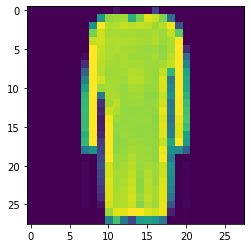

In [12]:
import numpy as np
import matplotlib.pyplot as plt


#choose number of image from dataset
index = 25

# Set number of characters per row when printing 
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {train_lab[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_img[index]}')

#showing loaded image
plt.imshow(train_img[index])

In [13]:
#Normalize training and test images 

train_img = train_img / 255.0
test_img = test_img / 255.0

# Step 3: Making model


First Layer:  the first layer in your network should be the same shape as your data, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.


Last Layer: the number of neurons in the last layer should match the number of classes you are classifying for

In [21]:
#using sequntial layers 
#flatten is used to flatten 28x28 image array into one layer
#using 128 neurons in second layer with rectified linear unit activation
#last layer will have 10 neurons and softmax activation
model1 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(128,activation = tf.nn.relu),
                              tf.keras.layers.Dense(10,activation = tf.nn.softmax)
])



In [24]:
model_more_layers = tf.keras.Sequential([
                                          tf.keras.layers.Flatten(),
                                          tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                          tf.keras.layers.Dense(128,activation = tf.nn.relu),
                                          tf.keras.layers.Dense(10,activation= tf.nn.softmax)
])

In [26]:
#build model with compile 
#here optimizer used is Adam and loss function used is 
#sparse categorical crossentropy another input with 
#name metrics = ['accuracy'] is passed
#train model with fit
model1.compile(optimizer= tf.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])
model1.fit(train_img,train_lab,epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2814 - accuracy: 0.8963
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2666 - accuracy: 0.9016
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9050
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2479 - accuracy: 0.9061
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2378 - accuracy: 0.9112


In [25]:
model_more_layers.compile(optimizer='Adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
model_more_layers.fit(train_img,train_lab,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4879 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3656 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3287 - accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3076 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2900 - accuracy: 0.8919


In [17]:
#evaluating model1
model1.evaluate(test_img,test_lab)

313/313 [==============================] - 1s 2ms/step - loss: 0.3620 - accuracy: 0.8697


[0.36200517416000366, 0.869700014591217]

In [23]:
model_more_layers.evaluate(test_img,test_lab)

313/313 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.8625


[0.38765788078308105, 0.862500011920929]

### Stopping training midway 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.95): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4759 - accuracy: 0.8309
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3581 - accuracy: 0.8680
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3235 - accuracy: 0.8803
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2993 - accuracy: 0.8900
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2799 - accuracy: 0.8967
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2646 - accuracy: 0.9012
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2528 - accuracy: 0.9053
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2401 - accuracy: 0.9108
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2311 - accuracy: 0.9140
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.218